# CS640 Project Writeup

In this project, you will work on a Kaggle competition titled [ISIC 2024 - Skin Cancer Detection with 3D-TBP](https://www.kaggle.com/competitions/isic-2024-challenge/overview). This is a binary classification task in which you need to predict if the patient has skin cancer. The competition is already close, but we will explore the rich (training) dataset it provides in this class.

***

## Data

We will be using the training dataset from the original competition for this class project. The dataset has been downloaded and preprocessed. You can find it on SCC at */projectnb/cs640grp/materials/ISIC-2024_CS640*. **You should use this downloaded dataset only, not the original one on the website.**

The directory looks like the following.

In [2]:
import os

project_dir = os.path.join(os.sep, 'projectnb', 'cs640grp', 'materials', 'ISIC-2024_CS640')
os.listdir(project_dir)

['test_metadata.csv',
 'submission.csv',
 'train_metadata.csv',
 'train_image',
 'test_image']

The CSV files store a list of attributes for each sample, and the image folders store a JPEG image per sample. The image names are sample IDs which can be found in the correpsonding CSV files. The submission.csv file is a template of your submission.

Let's first take a peek into the CSV files and a few sample images.

***

### Training Metadata

Note that in the metadata file, the **target** column is the label column.

In [3]:
import pandas

df_train = pandas.read_csv(os.path.join(project_dir, "train_metadata.csv"))
df_train

,id,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,...,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
0,0,0,55.0,male,upper extremity,2.58,3D: white,21.989610,18.149720,26.138980,...,3.207238,7.162229,1.181736,2.552678,2.169827,0.230000,45,-439.338600,1230.412000,22.647890
1,1,0,50.0,female,posterior torso,2.90,3D: XP,21.153528,17.243578,28.471102,...,2.749542,7.242474,1.014255,2.979940,1.937938,0.292453,65,-59.504822,1047.626465,109.244873
2,2,0,40.0,female,lower extremity,4.38,3D: XP,20.569130,14.896040,24.978840,...,4.339059,14.451710,1.233737,5.317332,1.839798,0.158025,0,-223.811100,770.993000,29.067170
3,3,0,50.0,female,upper extremity,2.76,3D: white,23.365559,18.483379,30.853418,...,1.650849,7.870664,0.496438,2.770145,2.381648,0.254237,90,-440.008942,1140.614502,-14.935974
4,4,0,60.0,male,posterior torso,3.31,3D: XP,23.061540,18.730060,29.790280,...,4.174303,10.950840,1.521283,1.608716,1.997881,0.461111,0,-108.822000,1215.113000,-101.404500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320842,320842,0,70.0,NaN,posterior torso,3.60,3D: XP,19.985520,15.393206,35.482277,...,1.317773,9.854949,0.359343,1.018512,2.205429,0.307692,115,30.655060,1204.034302,165.979797
320843,320843,0,45.0,male,posterior torso,5.88,3D: white,17.846150,11.566220,24.022090,...,6.996178,16.388990,1.827318,8.247600,2.282445,0.208081,140,-109.284200,1228.212000,155.480600
320844,320844,0,40.0,male,anterior torso,11.41,3D: XP,16.364410,6.870663,20.882192,...,3.671125,28.208751,1.136926,3.310037,1.509960,0.181329,0,-170.062561,1129.213257,28.841248
320845,320845,0,40.0,male,lower extremity,4.02,3D: XP,13.500010,10.076300,23.654770,...,2.443795,11.177810,0.847317,2.623507,3.329334,0.401914,10,249.819500,254.294600,55.758790


### Test Metadata

The test metadata file contains the same headers as the training one. Note that in this file, the **target** column is empty by design.

In [4]:
df_test = pandas.read_csv(os.path.join(project_dir, "test_metadata.csv"))
df_test

,id,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,...,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
0,0,NaN,30.0,male,upper extremity,2.52,3D: white,20.739760,17.346250,23.604410,...,2.013941,9.113276,0.793600,1.368380,3.130576,0.392593,85,-352.631000,1024.501000,21.431270
1,1,NaN,75.0,male,upper extremity,2.63,3D: white,21.498600,17.128050,26.919320,...,3.554856,6.968501,1.322546,2.980941,2.610491,0.342857,150,317.008100,1296.112000,85.410520
2,2,NaN,30.0,male,lower extremity,18.31,3D: XP,21.261867,15.949655,36.927874,...,3.685572,67.921989,1.323685,1.912243,3.394053,0.385400,145,-185.792664,680.623718,-21.791901
3,3,NaN,45.0,female,upper extremity,3.55,3D: XP,21.087236,15.657230,31.419333,...,2.082827,10.582854,0.691356,1.349557,1.570233,0.250000,155,443.583984,1213.412598,39.409851
4,4,NaN,55.0,male,anterior torso,7.06,3D: white,22.121790,14.444030,30.308130,...,3.691011,19.856620,0.989644,3.126280,2.467318,0.227068,70,-162.127900,1043.082000,-44.661830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80207,80207,NaN,75.0,male,posterior torso,2.88,3D: white,20.565030,15.228920,30.234170,...,1.458585,8.111398,0.618510,2.274461,1.914292,0.232000,10,-72.637900,1487.536000,138.852900
80208,80208,NaN,50.0,male,upper extremity,4.20,3D: white,16.314590,14.611030,25.403000,...,1.941789,11.952720,0.599103,1.422653,2.196585,0.331522,45,-477.687100,1121.040000,-38.915830
80209,80209,NaN,40.0,female,upper extremity,2.90,3D: XP,21.597580,17.705739,27.266721,...,3.355798,8.872541,1.076741,3.248064,1.624508,0.359477,25,442.464355,1128.834351,31.510681
80210,80210,NaN,75.0,male,posterior torso,3.32,3D: white,22.596327,20.186998,30.480790,...,0.000000,9.033031,0.000000,1.321416,2.082772,0.495050,10,-110.265747,1429.494385,156.874146


### Submission Template

This template file simply contains the first two columns of the test metadata file. You will need to fill the **target** column and submit for evaluation.

In [5]:
df_submission = pandas.read_csv(os.path.join(project_dir, "submission.csv"))
df_submission

,id,target
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
80207,80207,NaN
80208,80208,NaN
80209,80209,NaN
80210,80210,NaN


### Sample Images

We will view a few images from the training set. The image files are named after the corresponding sample IDs.

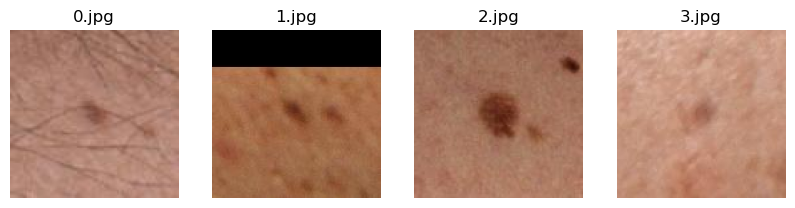

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img

fig, axes = plt.subplots(1, 4, figsize = (10, 20))
for i in range(4):
    id = str(df_train["id"][i])
    image = img.imread(os.path.join(project_dir, "train_image", id + ".jpg"))
    axes[i].imshow(image)
    axes[i].set_title(id + ".jpg")
    axes[i].set_axis_off()
plt.show()

***

## Tasks

In this project, you need to work in a team of at most **four** members to build AI models to classify the cancer status (0: negative, 1: positive). The team signup sheet can be found [here](https://docs.google.com/spreadsheets/d/19vqrE4G5LN05zADdiHAZP7pu0W9k9Rob2n2KmxCKlA8/edit?usp=sharing) (you need to use your BU account to access it).

Additionally, before you start the project, you must register for a Kaggle account, join the competition on its [website](https://www.kaggle.com/competitions/isic-2024-challenge/overview), and submit a screenshot of the team tab to Gradescope as a proof.

Since both tabular and image data are provided, you are expected to explore multimodal learning. To be more specific, we expect you to do the following.

- Examine and perform some statistical analysis to the data.
    - For example, you can check the distributions of the features in the metadata and find if there is a simple relation (say, linear relation) between some features and the target variable.
- Design and implement at least one model for each of the following categories:
    - Tabular data model
    - Computer vision model
    - Fusion model
        - A fusion model should combine two models from the previous two categories (one from each category, as "fusion" is defined in class).
- Perform stratified K-fold cross validation to demonstrate the performance of your models and choose your best model to predict the classes of the test samples.
    - While evaluating the performance during cross validation, consider the methods introduced at the beginning of the semester. For example, you should consider ROC analysis and perhaps even AUC analysis (check the ROC wiki page).
- Write a report to record your methods and findings.
    - You are free to choose any tool (Word, LaTex, Notebook, etc.) to write the report. The template is available on our course website.

### Challenges and Tips

We will provide some insights into the data and some ideas to get you started.

#### An (Extremely) Unbalance Dataset

If we compare the numbers of training samples in the negative and positive classes, we will have an astonishing finding.

In [7]:
counts = [df_train["target"].values.tolist().count(0), df_train["target"].values.tolist().count(1)]
print("Number of negative training samples: " + str(counts[0]))
print("Number of positive training samples: " + str(counts[1]))

Number of negative training samples: 320533
Number of positive training samples: 314


How to tackle this nature of the training set is one of the major problems you need to address during the cross validation. Furthermore, note that we do **NOT** know the label distribution in the test set.

#### Too Many Features

There are about 40 features in the metadata. Some of these features are categorical while some are numerical. The numerical features even have different ranges. Therefore, what features to choose and how to choose the right features are two problems you will face during feature engineering.

#### What Models to Use

We do not put any restriction on model selection on you. In fact, you are encouraged to explore pretrained models (e.g., from PyTorch online library) or even models shared by other competitors (check the code tab, models tab, discussion tab and the leaderboard tab on the competition website).

If you use any of the existing approaches,
Do

- cite the original approach by including links to its post;
- read and understand the approach (you need to explain the approach in your own words while writing the report); and
- verify the author's claims by applying their approach and try improving their method.
    - direct improvemnt of a single approach
    - fusion of different approaches
    - demonstrate how unreliable the approach is by showing, as an example, that their approach is sensitive to fluctuation or outliers in the data

But don't
- load the trained parameters;
    - the parameters here mean the weights trained by the authors
    - you can load model parameters that are not trained on this skin cancer detection task
- copy and paste the entire post to the report.
    - intead, summarize the approach in your own words (this is part of the study process)

## Evaluation

You will be graded mainly based on how much effort you put into this project. We do not ask you to find the solution that yields the perfect predictions (but your solution should at least beat random guessing). Instead, we expect you to explore the data and appcoaches, which should be reflected both in your presentation and your report.

Here is a general breakdown of the grading:

- Performance (10%)
    - Need to at least beat the random guessing
    - Otherwise you will receive a low project grade
- Presentation (20%)
    - The presentation is like a short version of your report:
        - Briefly talk about your approaches
        - Summarize your results and observations
        - Your goal is to let us understand the main parts of your work with little confusion
- Report (70%)
    - Your report doesn't have to be long, but must be complete (30%)
        - You need to complete the sections listed in the template
        - You need to demonstrate your effort into the project
    - Your description should be clear (20%)
        - Do not build a wall of text
        - Do not build a wall of numbers/figures
            - Only choose what matters to the point you are trying to make
            - Always describe the numbers/figures, don't let the readers guess
        - When explaining your approaches and results, using a combination of words and figures can be very helpful
    - Statements should be backed by evidence and reasoning (20%)
        - For example, if you find some interesting relation between A and B, you should show some evidence (say, a correlation plot)

## Statstical Analysis

In [8]:
import seaborn as sns
# print out the data types of each of the columns
df_train.head()

,id,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,...,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
0,0,0,55.0,male,upper extremity,2.58,3D: white,21.989610,18.149720,26.138980,...,3.207238,7.162229,1.181736,2.552678,2.169827,0.230000,45,-439.338600,1230.412000,22.647890
1,1,0,50.0,female,posterior torso,2.90,3D: XP,21.153528,17.243578,28.471102,...,2.749542,7.242474,1.014255,2.979940,1.937938,0.292453,65,-59.504822,1047.626465,109.244873
2,2,0,40.0,female,lower extremity,4.38,3D: XP,20.569130,14.896040,24.978840,...,4.339059,14.451710,1.233737,5.317332,1.839798,0.158025,0,-223.811100,770.993000,29.067170
3,3,0,50.0,female,upper extremity,2.76,3D: white,23.365559,18.483379,30.853418,...,1.650849,7.870664,0.496438,2.770145,2.381648,0.254237,90,-440.008942,1140.614502,-14.935974
4,4,0,60.0,male,posterior torso,3.31,3D: XP,23.061540,18.730060,29.790280,...,4.174303,10.950840,1.521283,1.608716,1.997881,0.461111,0,-108.822000,1215.113000,-101.404500


In [9]:
# figuring out what the categorical columns are in the data

cat_columns = df_train.select_dtypes(include=['object']).columns
cat_columns

Index(['sex', 'anatom_site_general', 'tbp_tile_type', 'tbp_lv_location',
       'tbp_lv_location_simple'],
      dtype='object')

In [10]:
# one hot encoding the categorical columns 
df_encoded = pandas.get_dummies(df_train, columns=cat_columns)

# made a feature to feature correlation df
df_feature_feature_corr = df_encoded.corr()
df_feature_feature_corr

,id,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,...,tbp_lv_location_Torso Front Top Half,tbp_lv_location_Unknown,tbp_lv_location_simple_Head & Neck,tbp_lv_location_simple_Left Arm,tbp_lv_location_simple_Left Leg,tbp_lv_location_simple_Right Arm,tbp_lv_location_simple_Right Leg,tbp_lv_location_simple_Torso Back,tbp_lv_location_simple_Torso Front,tbp_lv_location_simple_Unknown
id,1.000000,0.002258,0.000770,0.001712,-0.000592,0.000718,0.001239,0.000878,0.000803,0.001078,...,0.003424,-0.000324,0.001021,-0.001420,-0.001911,0.001838,0.000235,-0.002542,0.003624,-0.000324
target,0.002258,1.000000,0.008099,0.033083,0.020377,0.023913,-0.027422,-0.015246,-0.009832,-0.001695,...,0.002032,-0.003777,0.031744,-0.000172,-0.001660,-0.002094,-0.003346,-0.005281,-0.000614,-0.003777
age_approx,0.000770,0.008099,1.000000,0.017087,-0.011148,0.120487,-0.088124,-0.062768,-0.069453,-0.008924,...,0.031569,0.040446,0.002676,-0.023704,0.005797,-0.003819,0.006469,-0.028281,0.027862,0.040446
clin_size_long_diam_mm,0.001712,0.033083,0.017087,1.000000,-0.044075,-0.076030,-0.119139,-0.038346,-0.109219,-0.057566,...,0.023982,0.002708,-0.000226,-0.042139,-0.033756,-0.043192,-0.037939,0.058627,0.050637,0.002708
tbp_lv_A,-0.000592,0.020377,-0.011148,-0.044075,1.000000,0.761204,0.417080,0.490922,0.735792,0.675859,...,0.047088,0.025602,0.065247,-0.021985,-0.111370,-0.024798,-0.100855,0.121099,0.034902,0.025602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tbp_lv_location_simple_Right Arm,0.001838,-0.002094,-0.003819,-0.043192,-0.024798,0.028426,0.005123,0.006657,-0.007597,0.014973,...,-0.132462,-0.036920,-0.054003,-0.096658,-0.119641,1.000000,-0.115353,-0.202059,-0.161681,-0.036920
tbp_lv_location_simple_Right Leg,0.000235,-0.003346,0.006469,-0.037939,-0.100855,-0.070292,-0.175118,-0.183016,-0.174614,-0.175068,...,-0.163233,-0.045497,-0.066548,-0.119112,-0.147434,-0.115353,1.000000,-0.248998,-0.199240,-0.045497
tbp_lv_location_simple_Torso Back,-0.002542,-0.005281,-0.028281,0.058627,0.121099,0.072624,0.212713,0.234826,0.209230,0.215963,...,-0.285929,-0.079695,-0.116570,-0.208644,-0.258255,-0.202059,-0.248998,1.000000,-0.349001,-0.079695
tbp_lv_location_simple_Torso Front,0.003624,-0.000614,0.027862,0.050637,0.034902,-0.065590,0.050799,0.022448,0.056755,-0.003375,...,0.819277,-0.063769,-0.093276,-0.166950,-0.206647,-0.161681,-0.199240,-0.349001,1.000000,-0.063769


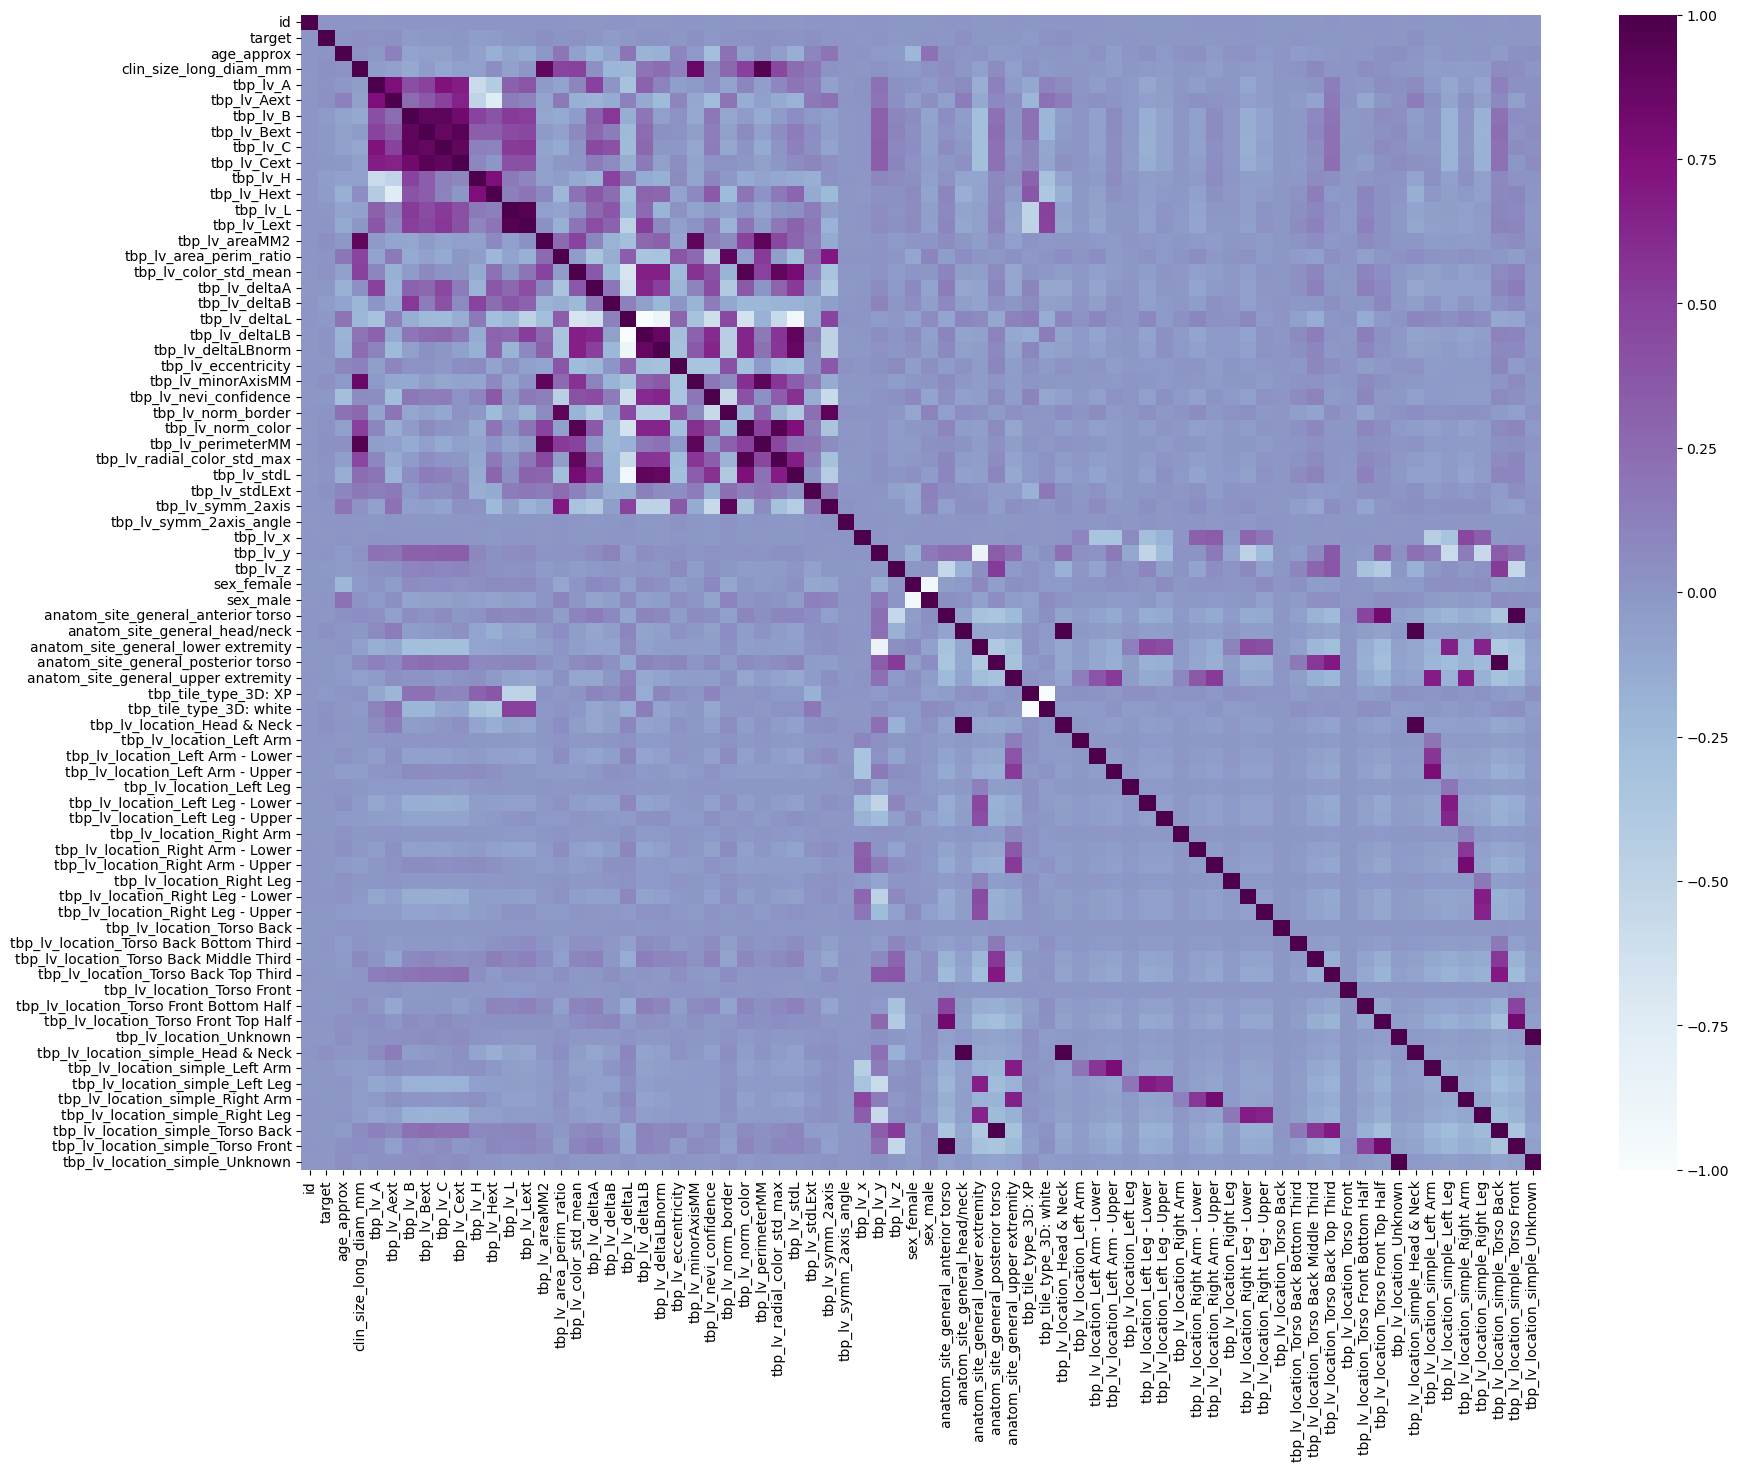

In [11]:
# plot a feature to feature heatmap correlation figure
# alot of the features are correlated to each other could be bc of one hot encoding????

plt.figure(figsize=(20, 15))
sns.heatmap(df_feature_feature_corr, annot=False, cmap='BuPu')
plt.show()

In [12]:
# get the features that are hightly correlated with each other and do something with them here
print(df_feature_feature_corr.unstack().sort_values(ascending=False))

id                       id                         1.000000
tbp_lv_x                 tbp_lv_x                   1.000000
tbp_lv_norm_border       tbp_lv_norm_border         1.000000
tbp_lv_norm_color        tbp_lv_norm_color          1.000000
tbp_lv_perimeterMM       tbp_lv_perimeterMM         1.000000
                                                      ...   
sex_male                 sex_female                -0.936436
tbp_lv_deltaL            tbp_lv_deltaLB            -0.992385
tbp_lv_deltaLB           tbp_lv_deltaL             -0.992385
tbp_tile_type_3D: XP     tbp_tile_type_3D: white   -1.000000
tbp_tile_type_3D: white  tbp_tile_type_3D: XP      -1.000000
Length: 5476, dtype: float64


In [13]:
# calculated correlation coefficients witht the target and sorted those r values

df_corr_with_target = df_encoded.corr()['target']
df_corr_with_target.sort_values(ascending=False)

target                    1.000000
tbp_lv_areaMM2            0.046452
tbp_lv_perimeterMM        0.037980
tbp_lv_minorAxisMM        0.037032
clin_size_long_diam_mm    0.033083
                            ...   
tbp_tile_type_3D: XP     -0.016057
tbp_lv_B                 -0.027422
tbp_lv_Hext              -0.034432
tbp_lv_deltaB            -0.034508
tbp_lv_H                 -0.046569
Name: target, Length: 74, dtype: float64

In [14]:
# calculated correlation coefficients witht the target , applied absolute value, and sorted those r values

df_corr_with_target.abs().sort_values(ascending=False)

target                              1.000000
tbp_lv_H                            0.046569
tbp_lv_areaMM2                      0.046452
tbp_lv_perimeterMM                  0.037980
tbp_lv_minorAxisMM                  0.037032
                                      ...   
tbp_lv_symm_2axis_angle             0.000229
tbp_lv_location_Left Arm - Lower    0.000197
tbp_lv_location_simple_Left Arm     0.000172
tbp_lv_location_Torso Back          0.000146
tbp_lv_Lext                         0.000082
Name: target, Length: 74, dtype: float64

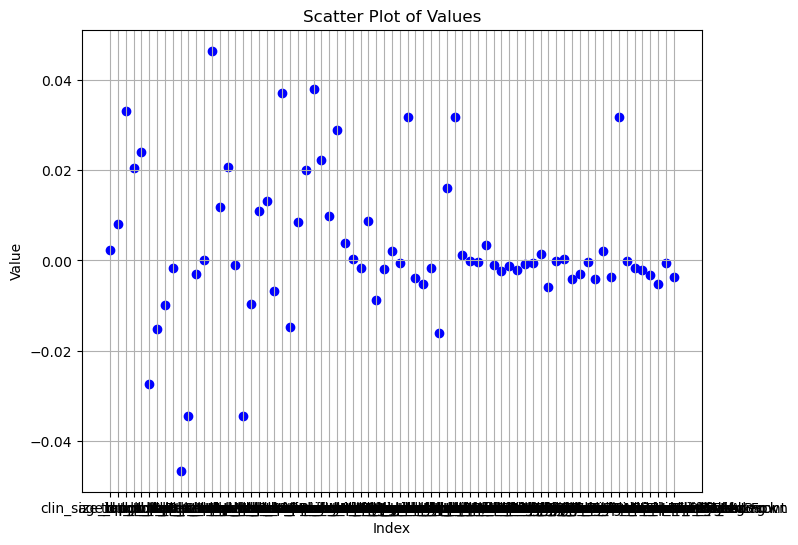

In [15]:
# plotting the correlation coefficients (features to target)
drop_target_df=df_corr_with_target.drop('target')

plt.figure(figsize=(8, 6))
plt.scatter(x=drop_target_df.index, y=drop_target_df.values, color='blue', marker='o')
plt.title('Scatter Plot of Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


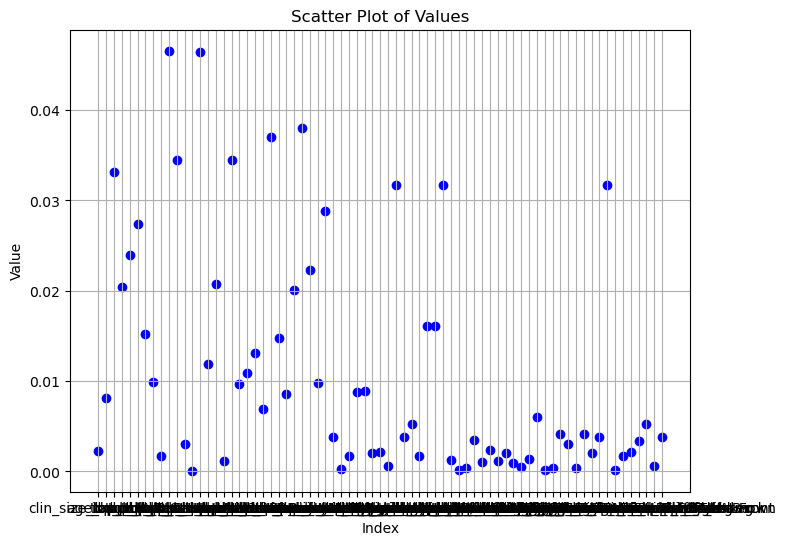

In [16]:
# plotting the correlation absolute value coefficients (features to target)

drop_target_df=df_corr_with_target.abs().drop('target')

plt.figure(figsize=(8, 6))
plt.scatter(x=drop_target_df.index, y=drop_target_df.values, color='blue', marker='o')
plt.title('Scatter Plot of Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()


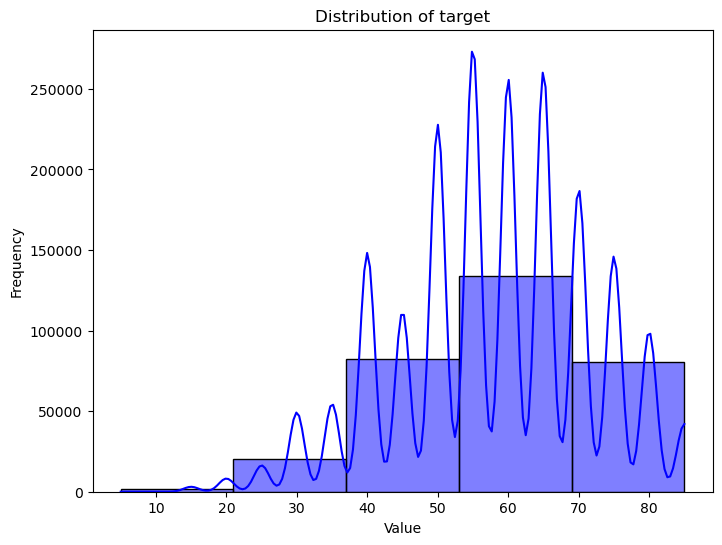

In [17]:
# Plot histogram of the age_approx distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_train['age_approx'], bins=5, kde=True, color='blue')
plt.title('Distribution of target')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

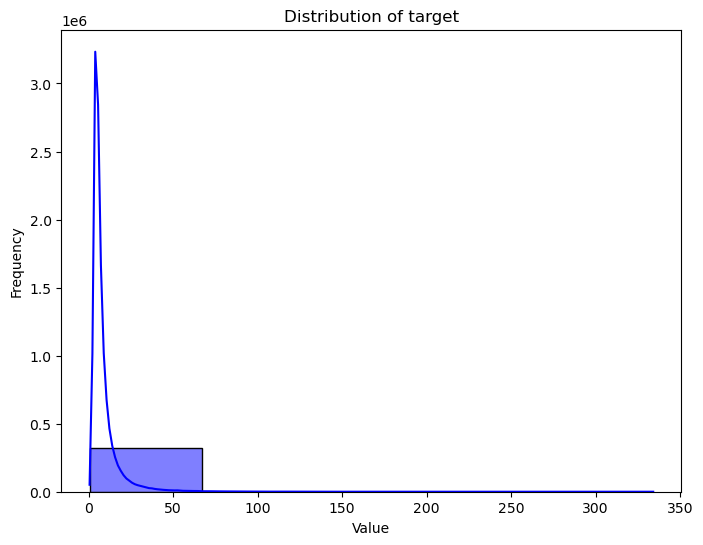

In [18]:
# Plot histogram of the tbp_lv_areaMM2 distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_train['tbp_lv_areaMM2'], bins=5, kde=True, color='blue')
plt.title('Distribution of target')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


## Feature Selection Investigation

In [19]:
!pip install imblearn
!pip install lightgbm
!pip install itertools
!pip install sklearn
!pip install warnings

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 72.1 MB/s eta 0:00:00a 0:00:01
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'skle

## Testing winning Tabular Implementation


In [35]:
import os
import itertools
from pathlib import Path

import numpy as np
import pandas as pd
import polars as pl

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")

In [21]:
id_col = 'id'
target_col = 'target'


err = 1e-5
sampling_ratio = 0.01
seed = 42

num_cols = [
    'age_approx',                        # Approximate age of patient at time of imaging.
    'clin_size_long_diam_mm',            # Maximum diameter of the lesion (mm).+
    'tbp_lv_A',                          # A inside  lesion.+
    'tbp_lv_Aext',                       # A outside lesion.+
    'tbp_lv_B',                          # B inside  lesion.+
    'tbp_lv_Bext',                       # B outside lesion.+ 
    'tbp_lv_C',                          # Chroma inside  lesion.+
    'tbp_lv_Cext',                       # Chroma outside lesion.+
    'tbp_lv_H',                          # Hue inside the lesion; calculated as the angle of A* and B* in LAB* color space. Typical values range from 25 (red) to 75 (brown).+
    'tbp_lv_Hext',                       # Hue outside lesion.+
    'tbp_lv_L',                          # L inside lesion.+
    'tbp_lv_Lext',                       # L outside lesion.+
    'tbp_lv_areaMM2',                    # Area of lesion (mm^2).+
    'tbp_lv_area_perim_ratio',           # Border jaggedness, the ratio between lesions perimeter and area. Circular lesions will have low values; irregular shaped lesions will have higher values. Values range 0-10.+
    'tbp_lv_color_std_mean',             # Color irregularity, calculated as the variance of colors within the lesion's boundary.
    'tbp_lv_deltaA',                     # Average A contrast (inside vs. outside lesion).+
    'tbp_lv_deltaB',                     # Average B contrast (inside vs. outside lesion).+
    'tbp_lv_deltaL',                     # Average L contrast (inside vs. outside lesion).+
    'tbp_lv_deltaLB',                    #
    'tbp_lv_deltaLBnorm',                # Contrast between the lesion and its immediate surrounding skin. Low contrast lesions tend to be faintly visible such as freckles; high contrast lesions tend to be those with darker pigment. Calculated as the average delta LB of the lesion relative to its immediate background in LAB* color space. Typical values range from 5.5 to 25.+
    'tbp_lv_eccentricity',               # Eccentricity.+
    'tbp_lv_minorAxisMM',                # Smallest lesion diameter (mm).+
    'tbp_lv_nevi_confidence',            # Nevus confidence score (0-100 scale) is a convolutional neural network classifier estimated probability that the lesion is a nevus. The neural network was trained on approximately 57,000 lesions that were classified and labeled by a dermatologist.+,++
    'tbp_lv_norm_border',                # Border irregularity (0-10 scale); the normalized average of border jaggedness and asymmetry.+
    'tbp_lv_norm_color',                 # Color variation (0-10 scale); the normalized average of color asymmetry and color irregularity.+
    'tbp_lv_perimeterMM',                # Perimeter of lesion (mm).+
    'tbp_lv_radial_color_std_max',       # Color asymmetry, a measure of asymmetry of the spatial distribution of color within the lesion. This score is calculated by looking at the average standard deviation in LAB* color space within concentric rings originating from the lesion center. Values range 0-10.+
    'tbp_lv_stdL',                       # Standard deviation of L inside  lesion.+
    'tbp_lv_stdLExt',                    # Standard deviation of L outside lesion.+
    'tbp_lv_symm_2axis',                 # Border asymmetry; a measure of asymmetry of the lesion's contour about an axis perpendicular to the lesion's most symmetric axis. Lesions with two axes of symmetry will therefore have low scores (more symmetric), while lesions with only one or zero axes of symmetry will have higher scores (less symmetric). This score is calculated by comparing opposite halves of the lesion contour over many degrees of rotation. The angle where the halves are most similar identifies the principal axis of symmetry, while the second axis of symmetry is perpendicular to the principal axis. Border asymmetry is reported as the asymmetry value about this second axis. Values range 0-10.+
    'tbp_lv_symm_2axis_angle',           # Lesion border asymmetry angle.+
    'tbp_lv_x',                          # X-coordinate of the lesion on 3D TBP.+
    'tbp_lv_y',                          # Y-coordinate of the lesion on 3D TBP.+
    'tbp_lv_z',                          # Z-coordinate of the lesion on 3D TBP.+
]

new_num_cols = [
    'lesion_size_ratio',             # tbp_lv_minorAxisMM      / clin_size_long_diam_mm
    'lesion_shape_index',            # tbp_lv_areaMM2          / tbp_lv_perimeterMM **2
    'hue_contrast',                  # tbp_lv_H                - tbp_lv_Hext              abs
    'luminance_contrast',            # tbp_lv_L                - tbp_lv_Lext              abs
    'lesion_color_difference',       # tbp_lv_deltaA **2       + tbp_lv_deltaB **2 + tbp_lv_deltaL **2  sqrt  
    'border_complexity',             # tbp_lv_norm_border      + tbp_lv_symm_2axis
    'color_uniformity',              # tbp_lv_color_std_mean   / tbp_lv_radial_color_std_max

    'position_distance_3d',          # tbp_lv_x **2 + tbp_lv_y **2 + tbp_lv_z **2  sqrt
    'perimeter_to_area_ratio',       # tbp_lv_perimeterMM      / tbp_lv_areaMM2
    'area_to_perimeter_ratio',       # tbp_lv_areaMM2          / tbp_lv_perimeterMM
    'lesion_visibility_score',       # tbp_lv_deltaLBnorm      + tbp_lv_norm_color
    'symmetry_border_consistency',   # tbp_lv_symm_2axis       * tbp_lv_norm_border
    'consistency_symmetry_border',   # tbp_lv_symm_2axis       * tbp_lv_norm_border / (tbp_lv_symm_2axis + tbp_lv_norm_border)

    'color_consistency',             # tbp_lv_stdL             / tbp_lv_Lext
    'consistency_color',             # tbp_lv_stdL*tbp_lv_Lext / tbp_lv_stdL + tbp_lv_Lext
    'size_age_interaction',          # clin_size_long_diam_mm  * age_approx
    'hue_color_std_interaction',     # tbp_lv_H                * tbp_lv_color_std_mean
    'lesion_severity_index',         # tbp_lv_norm_border      + tbp_lv_norm_color + tbp_lv_eccentricity / 3
    'shape_complexity_index',        # border_complexity       + lesion_shape_index
    'color_contrast_index',          # tbp_lv_deltaA + tbp_lv_deltaB + tbp_lv_deltaL + tbp_lv_deltaLBnorm

    'log_lesion_area',               # tbp_lv_areaMM2          + 1  np.log
    'normalized_lesion_size',        # clin_size_long_diam_mm  / age_approx
    'mean_hue_difference',           # tbp_lv_H                + tbp_lv_Hext    / 2
    'std_dev_contrast',              # tbp_lv_deltaA **2 + tbp_lv_deltaB **2 + tbp_lv_deltaL **2   / 3  np.sqrt
    'color_shape_composite_index',   # tbp_lv_color_std_mean   + bp_lv_area_perim_ratio + tbp_lv_symm_2axis   / 3
    'lesion_orientation_3d',         # tbp_lv_y                , tbp_lv_x  np.arctan2
    'overall_color_difference',      # tbp_lv_deltaA           + tbp_lv_deltaB + tbp_lv_deltaL   / 3

    'symmetry_perimeter_interaction',# tbp_lv_symm_2axis       * tbp_lv_perimeterMM
    'comprehensive_lesion_index',    # tbp_lv_area_perim_ratio + tbp_lv_eccentricity + bp_lv_norm_color + tbp_lv_symm_2axis   / 4
    'color_variance_ratio',          # tbp_lv_color_std_mean   / tbp_lv_stdLExt
    'border_color_interaction',      # tbp_lv_norm_border      * tbp_lv_norm_color
    'border_color_interaction_2',
    'size_color_contrast_ratio',     # clin_size_long_diam_mm  / tbp_lv_deltaLBnorm
    'age_normalized_nevi_confidence',# tbp_lv_nevi_confidence  / age_approx
    'age_normalized_nevi_confidence_2',
    'color_asymmetry_index',         # tbp_lv_symm_2axis       * tbp_lv_radial_color_std_max

    'volume_approximation_3d',       # tbp_lv_areaMM2          * sqrt(tbp_lv_x**2 + tbp_lv_y**2 + tbp_lv_z**2)
    'color_range',                   # abs(tbp_lv_L - tbp_lv_Lext) + abs(tbp_lv_A - tbp_lv_Aext) + abs(tbp_lv_B - tbp_lv_Bext)
    'shape_color_consistency',       # tbp_lv_eccentricity     * tbp_lv_color_std_mean
    'border_length_ratio',           # tbp_lv_perimeterMM      / pi * sqrt(tbp_lv_areaMM2 / pi)
    'age_size_symmetry_index',       # age_approx              * clin_size_long_diam_mm * tbp_lv_symm_2axis
    'index_age_size_symmetry',       # age_approx              * tbp_lv_areaMM2 * tbp_lv_symm_2axis
]

cat_cols = ['sex', 'anatom_site_general', 'tbp_tile_type', 'tbp_lv_location', 'tbp_lv_location_simple']
norm_cols = [f'{col}_patient_norm' for col in num_cols + new_num_cols]
special_cols = [f'{col}_count' for col in cat_cols] + [(f'{num_col}_{cat_col}') for num_col, cat_col in itertools.product(num_cols, cat_cols)]
feature_cols = num_cols + new_num_cols + cat_cols + norm_cols + special_cols

In [22]:
def read_data(path):
    return (
        pl.read_csv(path)
        .with_columns(
            pl.col('age_approx').cast(pl.String).replace('NA', np.nan).cast(pl.Float64),
        )
        .with_columns(
            pl.col(pl.Float64).fill_nan(pl.col(pl.Float64).median()), # You may want to impute test data with train
        )
        .with_columns(
            lesion_size_ratio              = pl.col('tbp_lv_minorAxisMM') / pl.col('clin_size_long_diam_mm'),
            lesion_shape_index             = pl.col('tbp_lv_areaMM2') / (pl.col('tbp_lv_perimeterMM') ** 2),
            hue_contrast                   = (pl.col('tbp_lv_H') - pl.col('tbp_lv_Hext')).abs(),
            luminance_contrast             = (pl.col('tbp_lv_L') - pl.col('tbp_lv_Lext')).abs(),
            lesion_color_difference        = (pl.col('tbp_lv_deltaA') ** 2 + pl.col('tbp_lv_deltaB') ** 2 + pl.col('tbp_lv_deltaL') ** 2).sqrt(),
            border_complexity              = pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_symm_2axis'),
            color_uniformity               = pl.col('tbp_lv_color_std_mean') / (pl.col('tbp_lv_radial_color_std_max') + err),
        )
        .with_columns(
            position_distance_3d           = (pl.col('tbp_lv_x') ** 2 + pl.col('tbp_lv_y') ** 2 + pl.col('tbp_lv_z') ** 2).sqrt(),
            perimeter_to_area_ratio        = pl.col('tbp_lv_perimeterMM') / pl.col('tbp_lv_areaMM2'),
            area_to_perimeter_ratio        = pl.col('tbp_lv_areaMM2') / pl.col('tbp_lv_perimeterMM'),
            lesion_visibility_score        = pl.col('tbp_lv_deltaLBnorm') + pl.col('tbp_lv_norm_color'),
            combined_anatomical_site       = pl.col('anatom_site_general') + '_' + pl.col('tbp_lv_location'),
            symmetry_border_consistency    = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_norm_border'),
            consistency_symmetry_border    = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_norm_border') / (pl.col('tbp_lv_symm_2axis') + pl.col('tbp_lv_norm_border')),
        )
        .with_columns(
            color_consistency              = pl.col('tbp_lv_stdL') / pl.col('tbp_lv_Lext'),
            consistency_color              = pl.col('tbp_lv_stdL') * pl.col('tbp_lv_Lext') / (pl.col('tbp_lv_stdL') + pl.col('tbp_lv_Lext')),
            size_age_interaction           = pl.col('clin_size_long_diam_mm') * pl.col('age_approx'),
            hue_color_std_interaction      = pl.col('tbp_lv_H') * pl.col('tbp_lv_color_std_mean'),
            lesion_severity_index          = (pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_norm_color') + pl.col('tbp_lv_eccentricity')) / 3,
            shape_complexity_index         = pl.col('border_complexity') + pl.col('lesion_shape_index'),
            color_contrast_index           = pl.col('tbp_lv_deltaA') + pl.col('tbp_lv_deltaB') + pl.col('tbp_lv_deltaL') + pl.col('tbp_lv_deltaLBnorm'),
        )
        .with_columns(
            log_lesion_area                = (pl.col('tbp_lv_areaMM2') + 1).log(),
            normalized_lesion_size         = pl.col('clin_size_long_diam_mm') / pl.col('age_approx'),
            mean_hue_difference            = (pl.col('tbp_lv_H') + pl.col('tbp_lv_Hext')) / 2,
            std_dev_contrast               = ((pl.col('tbp_lv_deltaA') ** 2 + pl.col('tbp_lv_deltaB') ** 2 + pl.col('tbp_lv_deltaL') ** 2) / 3).sqrt(),
            color_shape_composite_index    = (pl.col('tbp_lv_color_std_mean') + pl.col('tbp_lv_area_perim_ratio') + pl.col('tbp_lv_symm_2axis')) / 3,
            lesion_orientation_3d          = pl.arctan2(pl.col('tbp_lv_y'), pl.col('tbp_lv_x')),
            overall_color_difference       = (pl.col('tbp_lv_deltaA') + pl.col('tbp_lv_deltaB') + pl.col('tbp_lv_deltaL')) / 3,
        )
        .with_columns(
            symmetry_perimeter_interaction = pl.col('tbp_lv_symm_2axis') * pl.col('tbp_lv_perimeterMM'),
            comprehensive_lesion_index     = (pl.col('tbp_lv_area_perim_ratio') + pl.col('tbp_lv_eccentricity') + pl.col('tbp_lv_norm_color') + pl.col('tbp_lv_symm_2axis')) / 4,
            color_variance_ratio           = pl.col('tbp_lv_color_std_mean') / pl.col('tbp_lv_stdLExt'),
            border_color_interaction       = pl.col('tbp_lv_norm_border') * pl.col('tbp_lv_norm_color'),
            border_color_interaction_2     = pl.col('tbp_lv_norm_border') * pl.col('tbp_lv_norm_color') / (pl.col('tbp_lv_norm_border') + pl.col('tbp_lv_norm_color')),
            size_color_contrast_ratio      = pl.col('clin_size_long_diam_mm') / pl.col('tbp_lv_deltaLBnorm'),
            age_normalized_nevi_confidence = pl.col('tbp_lv_nevi_confidence') / pl.col('age_approx'),
            age_normalized_nevi_confidence_2 = (pl.col('clin_size_long_diam_mm')**2 + pl.col('age_approx')**2).sqrt(),
            color_asymmetry_index          = pl.col('tbp_lv_radial_color_std_max') * pl.col('tbp_lv_symm_2axis'),
        )
        .with_columns(
            volume_approximation_3d        = pl.col('tbp_lv_areaMM2') * (pl.col('tbp_lv_x')**2 + pl.col('tbp_lv_y')**2 + pl.col('tbp_lv_z')**2).sqrt(),
            color_range                    = (pl.col('tbp_lv_L') - pl.col('tbp_lv_Lext')).abs() + (pl.col('tbp_lv_A') - pl.col('tbp_lv_Aext')).abs() + (pl.col('tbp_lv_B') - pl.col('tbp_lv_Bext')).abs(),
            shape_color_consistency        = pl.col('tbp_lv_eccentricity') * pl.col('tbp_lv_color_std_mean'),
            border_length_ratio            = pl.col('tbp_lv_perimeterMM') / (2 * np.pi * (pl.col('tbp_lv_areaMM2') / np.pi).sqrt()),
            age_size_symmetry_index        = pl.col('age_approx') * pl.col('clin_size_long_diam_mm') * pl.col('tbp_lv_symm_2axis'),
            index_age_size_symmetry        = pl.col('age_approx') * pl.col('tbp_lv_areaMM2') * pl.col('tbp_lv_symm_2axis'),
        )
        .with_columns(
            ((pl.col(col) - pl.col(col).mean().over('id')) / (pl.col(col).std().over('id') + err)).alias(f'{col}_patient_norm') for col in (num_cols + new_num_cols)
        )
        .with_columns(
            ((pl.col(num_col) - pl.col(num_col).mean().over('id', cat_col)) / (pl.col(num_col).std().over('id', cat_col) + err)).alias(f'{num_col}_{cat_col}') for num_col, cat_col in itertools.product(num_cols, cat_cols)
        )
        .with_columns(
            pl.col(col).count().over('id', col).alias(f'{col}_count') for col in cat_cols
        )
        .with_columns(
            pl.col(cat_cols).cast(pl.Categorical),
        )
        .to_pandas()
        .set_index(id_col)
    )

In [23]:
def preprocess(df_train, df_test):
    global cat_cols
    
    encoder = OneHotEncoder(sparse_output=False, dtype=np.int32, handle_unknown='ignore')
    encoder.fit(df_train[cat_cols])
    
    new_cat_cols = [f'onehot_{i}' for i in range(len(encoder.get_feature_names_out()))]

    df_train[new_cat_cols] = encoder.transform(df_train[cat_cols])
    df_train[new_cat_cols] = df_train[new_cat_cols].astype('category')

    df_test[new_cat_cols] = encoder.transform(df_test[cat_cols])
    df_test[new_cat_cols] = df_test[new_cat_cols].astype('category')

    for col in cat_cols:
        feature_cols.remove(col)

    feature_cols.extend(new_cat_cols)
    cat_cols = new_cat_cols
    
    return df_train, df_test

In [24]:
def custom_metric(estimator, X, y_true):
    y_hat = estimator.predict_proba(X)[:, 1]
    min_tpr = 0.80
    max_fpr = abs(1 - min_tpr)
    
    v_gt = abs(y_true - 1)
    v_pred = np.array([1.0 - x for x in y_hat])
    
    partial_auc_scaled = roc_auc_score(v_gt, v_pred, max_fpr=max_fpr)
    partial_auc = 0.5 * max_fpr**2 + (max_fpr - 0.5 * max_fpr**2) / (1.0 - 0.5) * (partial_auc_scaled - 0.5)
    
    return partial_auc

In [25]:
df_train = read_data(os.path.join(project_dir, "train_metadata.csv"))
df_test = read_data(os.path.join(project_dir, "test_metadata.csv"))
df_train, df_test = preprocess(df_train, df_test)

df_train['patient_id'] = range(1, len(df_train) + 1)
df_test['patient_id'] = range(1, len(df_test) + 1)


df_train
df_test

,target,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,...,onehot_31,onehot_32,onehot_33,onehot_34,onehot_35,onehot_36,onehot_37,onehot_38,onehot_39,patient_id
id,,,,,,,,,,,,,,,,,,,,,
0,None,30.0,male,upper extremity,2.52,3D: white,20.739760,17.346250,23.604410,23.889980,...,0,0,1,0,0,0,0,0,0,1
1,None,75.0,male,upper extremity,2.63,3D: white,21.498600,17.128050,26.919320,25.133400,...,0,0,0,0,1,0,0,0,0,2
2,None,30.0,male,lower extremity,18.31,3D: XP,21.261867,15.949655,36.927874,31.626633,...,0,0,0,1,0,0,0,0,0,3
3,None,45.0,female,upper extremity,3.55,3D: XP,21.087236,15.657230,31.419333,28.252754,...,0,0,0,0,1,0,0,0,0,4
4,None,55.0,male,anterior torso,7.06,3D: white,22.121790,14.444030,30.308130,28.017560,...,0,0,0,0,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80207,None,75.0,male,posterior torso,2.88,3D: white,20.565030,15.228920,30.234170,26.859380,...,0,0,0,0,0,0,1,0,0,80208
80208,None,50.0,male,upper extremity,4.20,3D: white,16.314590,14.611030,25.403000,25.270420,...,0,0,1,0,0,0,0,0,0,80209
80209,None,40.0,female,upper extremity,2.90,3D: XP,21.597580,17.705739,27.266721,29.291961,...,0,0,0,0,1,0,0,0,0,80210


In [26]:
df_train['patient_id']

id
0              1
1              2
2              3
3              4
4              5
           ...  
320842    320843
320843    320844
320844    320845
320845    320846
320846    320847
Name: patient_id, Length: 320847, dtype: int64

In [27]:
#parameters for light gbm -> 

lgb_params = {
    'objective':        'binary',
    'verbosity':        -1,
    'n_iter':           200,
    'n_jobs':           2,
    'boosting_type':    'gbdt',
    'lambda_l1':        0.03335206514282942, 
    'lambda_l2':        0.005157393323802471, 
    'learning_rate':    0.030665870185795318, 
    'max_depth':        7, 
    'num_leaves':       239, 
    'colsample_bytree': 0.7573175155547233, 
    'colsample_bynode': 0.5005423904042993, 
    'bagging_fraction': 0.7937347683420382, 
    'bagging_freq':     4, 
    'min_data_in_leaf': 29, 
    'scale_pos_weight': 1.648349898918236,
}


estimator = VotingClassifier([
    ('lgb1', Pipeline([
        ('sampler', RandomUnderSampler(sampling_strategy=sampling_ratio, random_state=12)),
        ('classifier', lgb.LGBMClassifier(**lgb_params, random_state=12)),
    ])),
    ('lgb2', Pipeline([
        ('sampler', RandomUnderSampler(sampling_strategy=sampling_ratio, random_state=22)),
        ('classifier', lgb.LGBMClassifier(**lgb_params, random_state=22)),
    ])),
    ('lgb3', Pipeline([
        ('sampler', RandomUnderSampler(sampling_strategy=sampling_ratio, random_state=32)),
        ('classifier', lgb.LGBMClassifier(**lgb_params, random_state=32)),
    ])),
    ('lgb4', Pipeline([
        ('sampler', RandomUnderSampler(sampling_strategy=sampling_ratio, random_state=42)),
        ('classifier', lgb.LGBMClassifier(**lgb_params, random_state=42)),
    ])),
    ('lgb5', Pipeline([
        ('sampler', RandomUnderSampler(sampling_strategy=sampling_ratio, random_state=52)),
        ('classifier', lgb.LGBMClassifier(**lgb_params, random_state=52)),
    ])),
], voting='soft')

In [36]:

X = df_train[feature_cols]
y = df_train[target_col]
groups = df_train["patient_id"]
cv = StratifiedKFold(5, shuffle=True, random_state=seed) # changed to stratifiedkfold (from stratifiedgroupkfold) to account for missing groups argument

val_score = cross_val_score(
    estimator=estimator, 
    X=X, y=y, 
    cv=cv, 
    # groups=groups,
    scoring=custom_metric,
)

np.mean(val_score), val_score

(0.16340999173308815,
 array([0.1662169 , 0.16482716, 0.15652284, 0.16344348, 0.16603958]))

### add some explanation as to what this classifier is doing here ^^^

The voting classifier trains five different LightGBM models. LightGBM is a gradient-boosting algorithm that provides several benefits. Firstly, it can handle categorical features. Additionally, it grows leaf-wise, in contrast to level-wise, meaning that for every iteration, the model splits on the node that will result in the greatest loss reduction (here, log-loss), making it more efficient than a level-wise rowth method such as XGBoost. The parameters with which LightGBM determines how to split are num_leaves, which says how many leaves the model should create, min_data_in_leaf which specifies how many samples a leaf must include for a split to occur; lambda_l1 and lambda12, which are regularization terms that reduce overfitting by penalizing overly complex models, and finally max_depth which specifies how many layers a tree can have. LightGBM has further benefits, especially for a task such as this, because of its ability to handle imbalanced classes with scale_pos_weight. This parameter makes it so that the positive class is more heavily weighted than the negative one; the value of scale_pos_weight in this model makes the positive class 1.648349898918236 times heavier than the negative, helping reduce the bias towards the negative class and improves the scoring metric. In this implementation, colsample_bytree and colsample_bynode are employed, leading to a random sample of the features that can be used for each tree and node, respectively, limiting overfitting. Bagging fraction and bagging frequency also help reduce overfitting by sampling a random subset of the data for training, resampling every specified number of iterations. Other parameters defined in this model are boosting type, which sets the boosting method to be gradient boosting decision trees, which sequentially builds an ensemble of trees with each tree moving to descend the gradient, aiming to fix the mistakes of their predecessors. Finally, the learning rate for this model was set to 0.030665870185795318, likely to ensure robust training. 

* Note:
* verbosity = disables LightGBM Logging levels (silences output),
* n_inter = number of boosting iterations (trees),
* n_jobs = parallel processing, 

This classifier uses Stratified K fold for cross-validation, splitting the data 5 times into training and validation sets. Using stratified k-fold is important because, for each split, it maintains the positive and negative class ratio seen in the entire dataset. With this dataset, because there is such an imbalance of the classes, it is essential for good predictions that the whole dataset's ratio is maintained within each fold. 

Cross_val_score shows the model's performance for each of the five splits produced in StratifiedKFold. Here, the custom scoring metric is a partial AUC value used because medical professionals are interested in the model performing in a specific section of the AUC, which displays a model's performance in terms of the true and false positive rate. A model being used for medical decisions will need to be sensitive enough to detect cancer when it exists, making it important to evaluate sensitivity, especially when considering that the training data includes so few positive samples. However, it must also not lead to too many false positives, giving patients unnecessary stress. By evaluating a model on the part of the AUC with an ideal balance between true and false positive rates, it can be ensured that the model works in the given parameters. 

Works Cited: 

https://lightgbm.readthedocs.io/en/stable/Features.html
https://lightgbm.readthedocs.io/en/stable/Parameters.html
https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html
https://www.analyticsvidhya.com/blog/2023/02/partial-auc-scores-a-better-metric-for-binary-classification/


In [37]:
X, y = df_train[feature_cols], df_train[target_col]

estimator.fit(X, y)

VotingClassifier(estimators=[('lgb1',
                              Pipeline(steps=[('sampler',
                                               RandomUnderSampler(random_state=12,
                                                                  sampling_strategy=0.01)),
                                              ('classifier',
                                               LGBMClassifier(bagging_fraction=0.7937347683420382,
                                                              bagging_freq=4,
                                                              colsample_bynode=0.5005423904042993,
                                                              colsample_bytree=0.7573175155547233,
                                                              lambda_l1=0.03335206514282942,
                                                              lambda_l2=0.005157393323802471,
                                                              learning_rate...
                                                              bagging_freq=4,
                                                              colsample_bynode=0.5005423904042993,
                                                              colsample_bytree=0.7573175155547233,
                                                              lambda_l1=0.03335206514282942,
                                                              lambda_l2=0.005157393323802471,
                                                              learning_rate=0.030665870185795318,
                                                              max_depth=7,
                                                              min_data_in_leaf=29,
                                                              n_iter=200,
                                                              n_jobs=2,
                                                              num_leaves=239,
                                                              objective='binary',
                                                              random_state=52,
                                                              scale_pos_weight=1.648349898918236,
                                                              verbosity=-1))]))],
                 voting='soft')

In [38]:
values = estimator.predict_proba(df_test[feature_cols])[:, 1]

In [31]:
values

array([0.00059107, 0.00053108, 0.00185425, ..., 0.0004347 , 0.00043146,
       0.00097237])

In [32]:
# insert values into submission tabular csv
df_subm = pd.read_csv('submission_tabular.csv', index_col='id')
df_subm['target'] = values

df_subm.to_csv('submission_tabular.csv')
df_subm.head()

FileNotFoundError: [Errno 2] No such file or directory: 'submission_tabular.csv'